<a href="https://colab.research.google.com/github/Fiyrflash/Powerplay/blob/master/E_A_T_Version_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title **Enable Google Drive**
# @markdown Once you run this cell, click the file icon on the left and select the folder and copy the file path into the field titled "Source Directory"
from google.colab import drive; drive.mount('/content/drive');


Mounted at /content/drive


<ipython-input-6-4c1e1bab08e3>:40: RuntimeWarning: divide by zero encountered in double_scalars
  self.power_spectral_density = [power/frequency if (power/frequency) != float('inf') else 0  for power, frequency in zip(self.power, self.frequency)]



Voltage Cumulative Moving Average 0.00016801105934006436 


Frequency Cumulative Moving Average 0.0 


Frequency Mode 0.0 


Frequency Maximum 0.0 


Frequency Maximum Excluding Lower Bands 60.0 


Global Polarity [-815.4646158884279, -462.9528657649644, 1318.787831725087, 335.83927612099797, 518.4324116576463, 853.9837154820561, 875.3703333786689, 305.6208844790235, 783.9952277112752, 614.2860475219786, 185.6112348008901, 246.20322393300012, 1263.6430068784393, 311.57854510843754, 536.0099414493889, 1242.5424913284369, 1338.9477624362335, 377.0267943330109, 1232.2241073506884, 1059.0891788019799, 760.5142658394761, 672.6434464305639, 1765.06448358763, 1320.6671314528212, 1472.2976352563128, 1747.3897163970396, 1817.1145412209444, 713.9899103906937, 814.1986597534269, 123.02587899239734, 154.49152726959437, 161.6927046342753, 770.6886636689305, 274.8265482438728, -11.004655619617552, 343.0292337858118, 419.58685582876205, -646.2360128434375, -644.8989986092784, -1391.2876623161137, -1

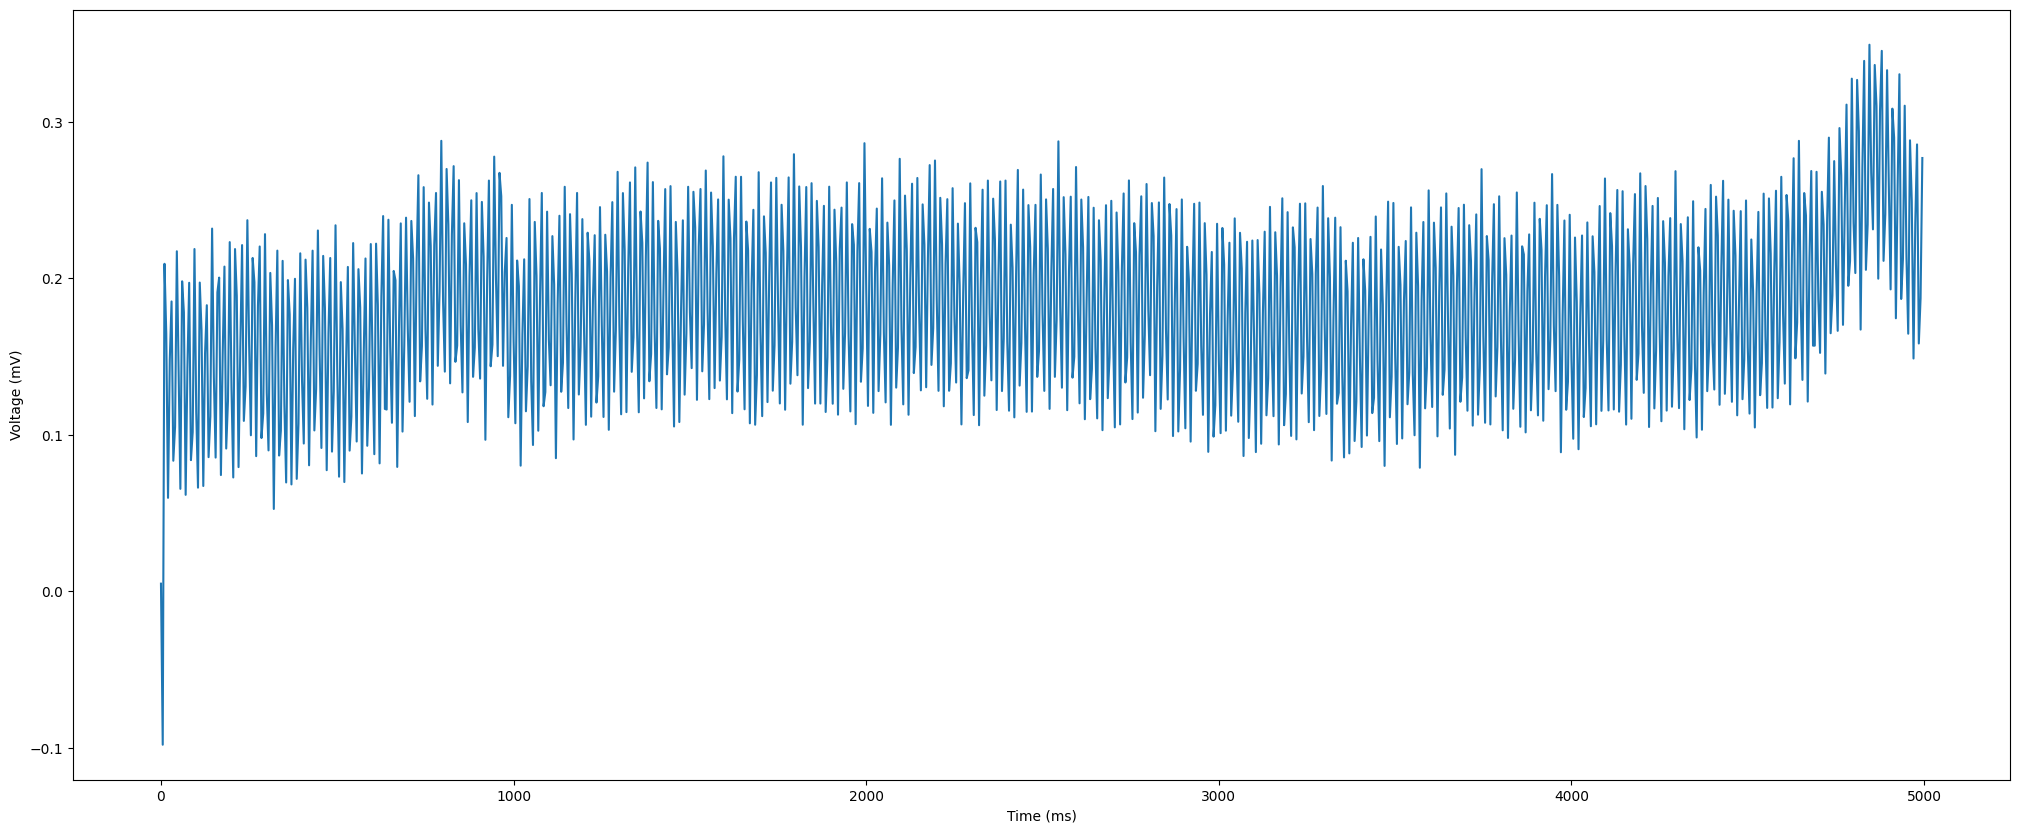

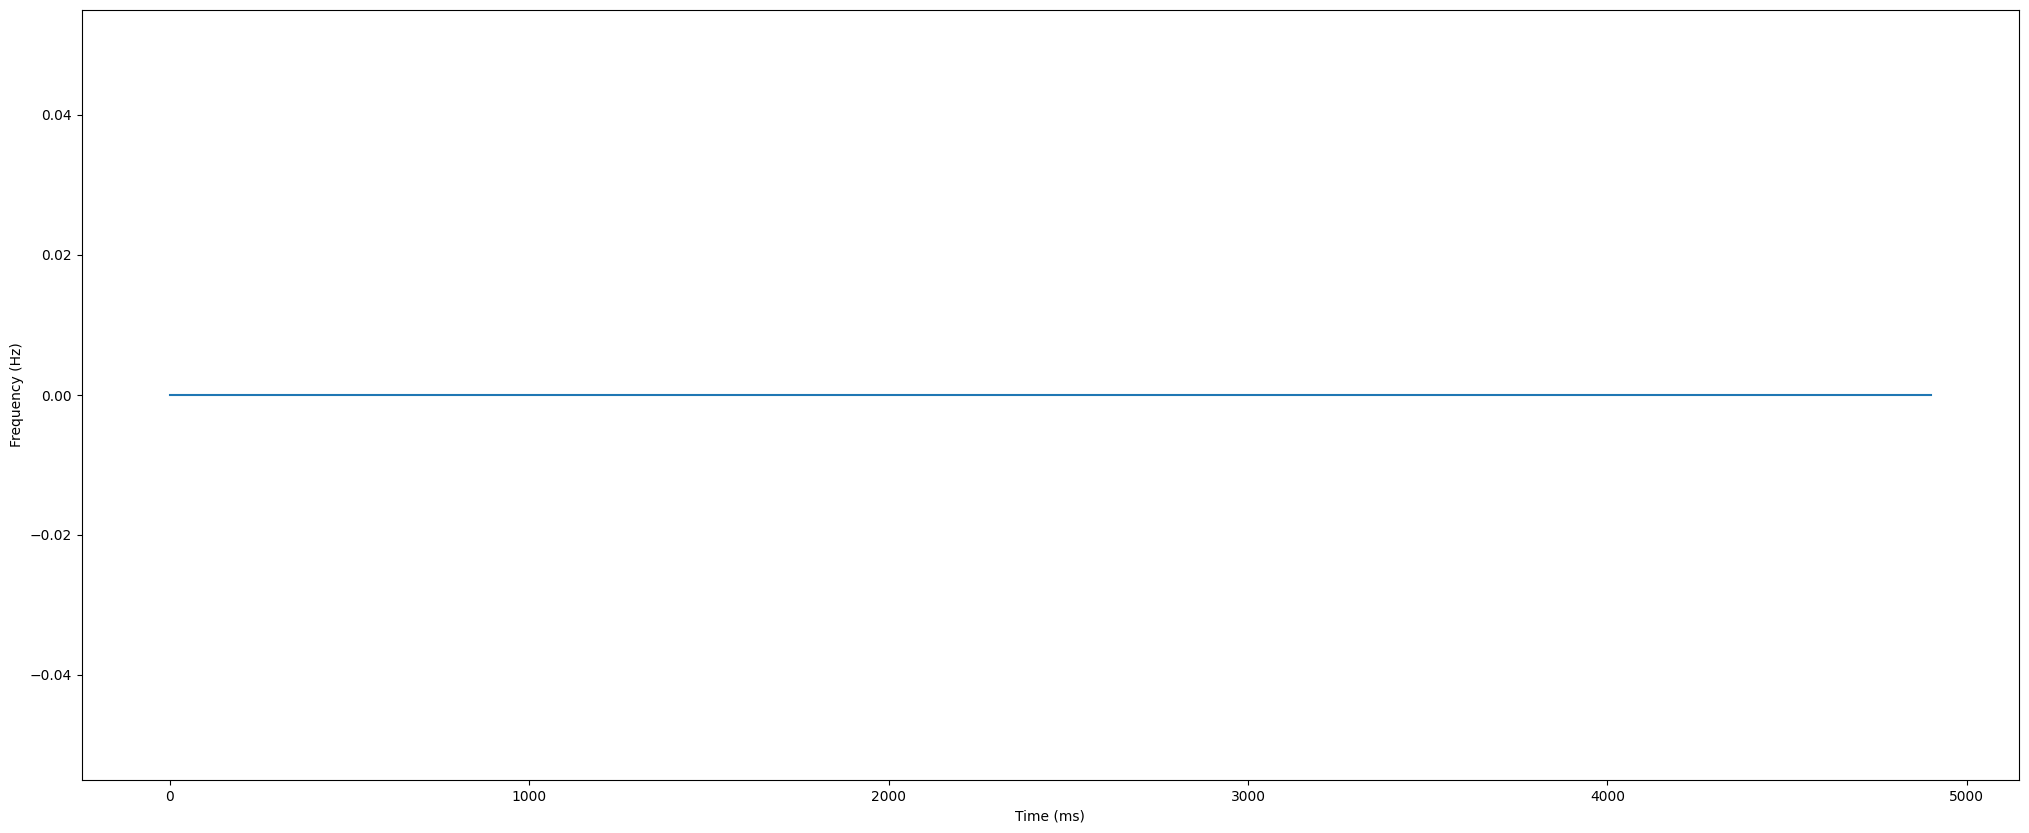

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

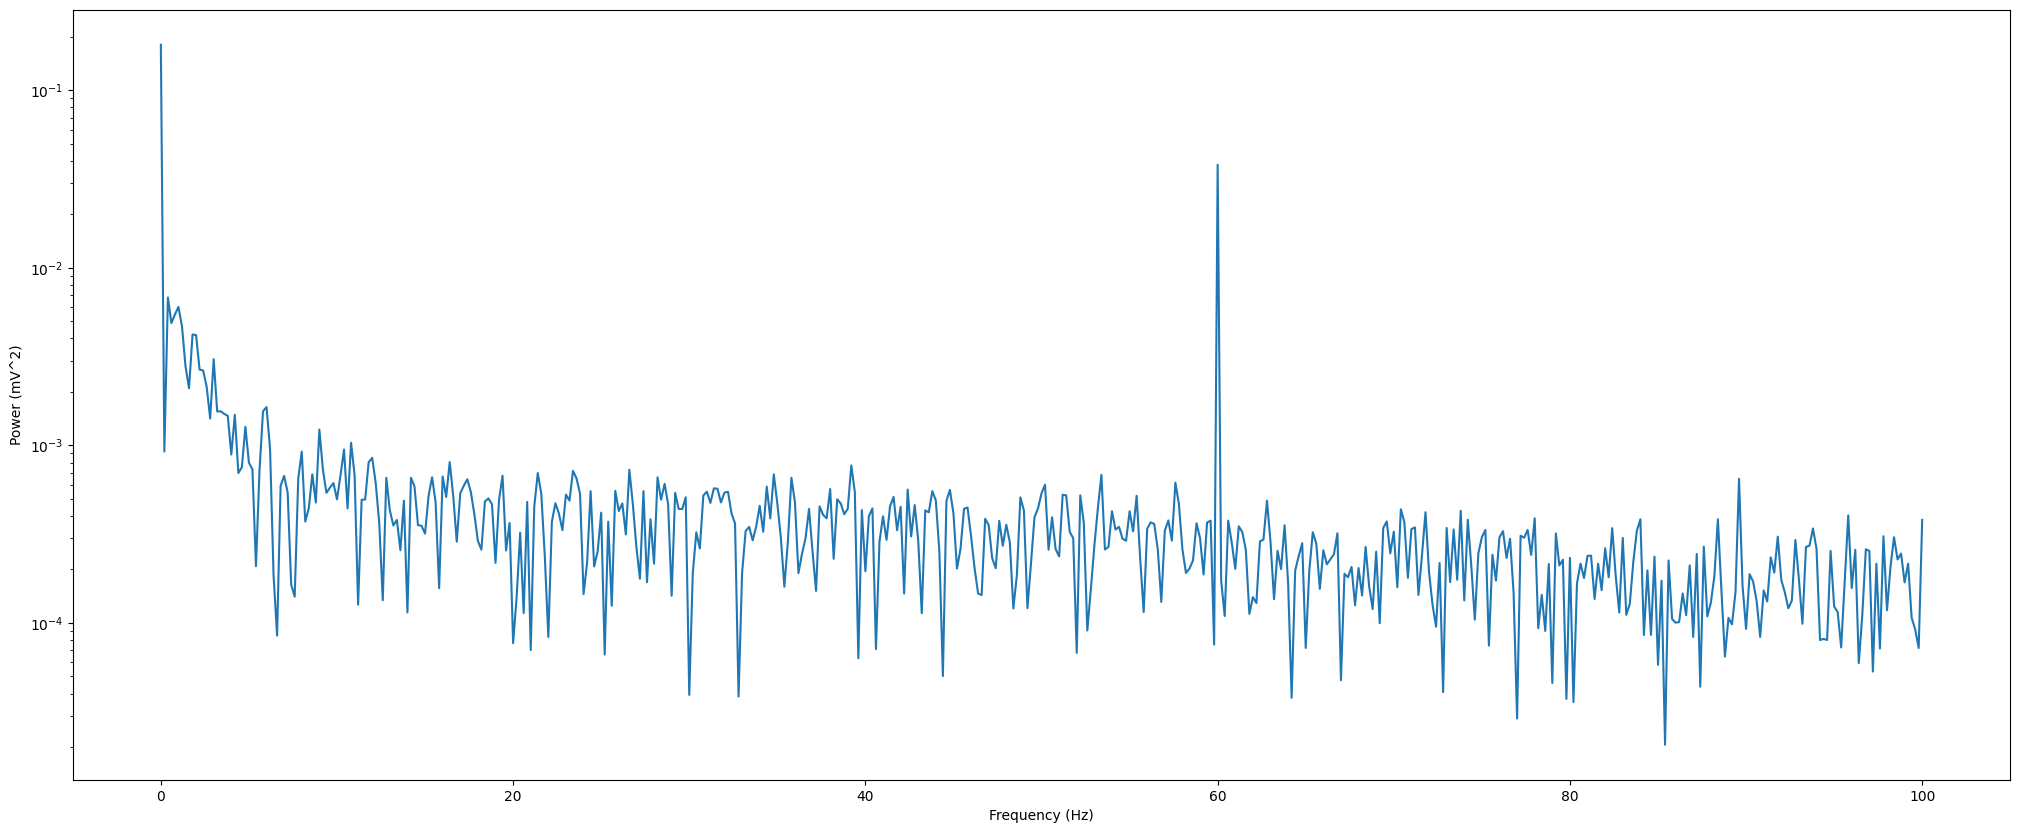

<Figure size 2500x1000 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [6]:
#@title **E.A.T. Version 0.3** { vertical-output: true, display-mode: "form" }
import os; import pandas as pd; from scipy.fft import rfftfreq, rfft; from statistics import mode; import matplotlib.pyplot as plt; import shutil;
# @markdown **Source Directory**
directory_path = '/content/drive/MyDrive/F.O. Depository/P11_Trial46_Label0' # @param ['/content/drive/MyDrive/P10_Trial1/P10_Trial13_Label2'] {allow-input: true, type: "string"}
bin_size = 20 # time cannot be less than bin_size
# @markdown **Presets**
data_frame = pd.concat([pd.read_csv(file_path, names = ['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Other 1', 'Other 2', 'Other 3', 'Other 4', 'Other 5', 'Timestamp', 'Other 6', 'Timestamp (Formatted)']).drop(columns = ['Sample Index', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Other 1', 'Other 2', 'Other 3', 'Other 4', 'Other 5', 'Timestamp', 'Other 6', 'Timestamp (Formatted)']).iloc[5:1006] for file_path in [os.path.join(directory_path, path) for path in os.listdir(directory_path)]], axis = 1).fillna(0)
channel_number = 15 # @param {type: "integer"}
start = 0 # @param {type: "integer"}
stop = 5000 # @param {type: "integer"}
time = slice(int(start/5), int(stop/5))
# @markdown **Test**
voltage = False # @param {type: "boolean"}
frequency = False # @param {type: "boolean"}
power = False # @param {type: "boolean"}
voltage_time_plot = True # @param {type: "boolean"}
frequency_time_plot = True # @param {type: "boolean"}
power_spectral_density = False # @param {type: "boolean"}
voltage_cumulative_moving_average = True # @param {type: "boolean"}
power_time_plot = False # @param {type: "boolean"}
continuous_power_time_plot = False # @param {type: "boolean"}
frequency_cumulative_moving_average = True # @param {type: "boolean"}
frequency_mode = True # @param {type: "boolean"}
power_frequency_plot = True # @param {type: "boolean"}
frequency_maximum = True # @param {type: "boolean"}
frequency_maximum_excluding_lower_bands = True # @param {type: "boolean"}
global_polarity = True # @param {type: "boolean"}
global_polarity_cumulative_moving_average = False # @param {type: "boolean"}
global_polarity_time_plot = False # @param {type: "boolean"}
voltage_riemann_sum = False # @param {type: "boolean"}
feature_vector = False # @param {type: "boolean"}
global_polarity_head_plot = False # @param {type: "boolean"}
class Channel:
  def __init__(self, channel, time = slice(0, 1000)):
    self.voltage = [float(value)/1_000_000 for value in data_frame.iloc[time, channel].values]
    self.frequency = [max(zip(abs(rfft(bin)), rfftfreq(len(bin), 0.005)))[1] for bin in [[float(value)/1_000_000 for value in data_frame.iloc[time, channel].values][start:stop] for start, stop in zip([i * bin_size for i in range(0, int(len([float(value)/1_000_000 for value in data_frame.iloc[time, channel].values])/bin_size))], [i * bin_size for i in range(1, int(len([float(value)/1_000_000 for value in data_frame.iloc[time, channel].values])/bin_size) + 1)])]]
    self.power = [max(zip(abs(rfft(bin)), rfftfreq(len(bin), 0.005)))[0] for bin in [[float(value)/1_000_000 for value in data_frame.iloc[time, channel].values][start:stop] for start, stop in zip([i * bin_size for i in range(0, int(len([float(value)/1_000_000 for value in data_frame.iloc[time, channel].values])/bin_size))], [i * bin_size for i in range(1, int(len([float(value)/1_000_000 for value in data_frame.iloc[time, channel].values])/bin_size) + 1)])]]
    self.voltage_time_plot = plt.figure(num = 1, figsize = (25, 10));plt.plot([i * 5 for i in range(0, len(data_frame))][time], [value * 1_000 for value in self.voltage]);plt.xlabel('Time (ms)');plt.ylabel('Voltage (mV)') if voltage_time_plot else plt.clf()
    self.frequency_time_plot = plt.figure(num = 2, figsize = (25, 10));plt.plot([i * bin_size * 5 for i in range(0, int(len(data_frame.iloc[time])/bin_size))], self.frequency);plt.xlabel('Time (ms)');plt.ylabel('Frequency (Hz)') if frequency_time_plot else plt.clf()
    self.power_spectral_density = [power/frequency if (power/frequency) != float('inf') else 0  for power, frequency in zip(self.power, self.frequency)]
    self.voltage_cumulative_moving_average = sum([sum(bin)/len(bin) for bin in [[float(value)/1_000_000 for value in data_frame.iloc[time, channel].values][0:stop] for stop in [i * bin_size for i in range(1, int(len([float(value)/1_000_000 for value in data_frame.iloc[time, channel].values])/bin_size) + 1)]]])/len([sum(bin)/len(bin) for bin in [[float(value)/1_000_000 for value in data_frame.iloc[time, channel].values][0:stop] for stop in [i * bin_size for i in range(1, int(len([float(value)/1_000_000 for value in data_frame.iloc[time, channel].values])/bin_size) + 1)]]])
    self.power_time_plot = plt.figure(num = 3, figsize = (25, 10));plt.plot([i * bin_size * 5 for i in range(0, int(len(data_frame.iloc[time])/bin_size))], self.power);plt.xlabel('Time (ms)');plt.ylabel('Power (mV^2)') if power_time_plot else plt.clf()
    self.continuous_power_time_plot = plt.figure(num = 4, figsize = (25, 10));plt.plot([i * 5 for i in range(0, len(data_frame))][time], [value * value * 1_000_000 for value in self.voltage]);plt.xlabel('Time (ms)');plt.ylabel('Power (mV^2)') if continuous_power_time_plot else plt.clf()
    self.frequency_cumulative_moving_average = sum([sum(bin)/len(bin) for bin in [self.frequency[0:stop] for stop in [i * bin_size for i in range(1, int(len(self.frequency)/bin_size) + 1)]]])/(int(len(self.frequency)/bin_size) + 1)
    self.frequency_mode = mode(self.frequency)
    self.power_frequency_plot = plt.figure(num = 5, figsize = (25, 10));plt.plot(rfftfreq(len(self.voltage), 0.005), [abs(value) for value in rfft(self.voltage * 1_000, len(self.voltage))]);plt.xlabel('Frequency (Hz)');plt.ylabel('Power (mV^2)');plt.yscale('log') if power_frequency_plot else plt.clf()
    self.frequency_maximum = max(list(zip([abs(value) for value in rfft(self.voltage * 1_000, len(self.voltage))], rfftfreq(len(self.voltage), 0.005))))[1]
    self.frequency_maximum_excluding_lower_bands = max(sorted(list(zip([abs(value) for value in rfft(self.voltage * 1_000, len(self.voltage))], rfftfreq(len(self.voltage), 0.005))), key = lambda x:x[1])[60:])[1] # same as frequency_maximum but excludes theta, delta, and gamma bands
    self.global_polarity = [(float(data_frame.iloc[i, 0]) + float(data_frame.iloc[i, 1]) + float(data_frame.iloc[i, 5]) + float(data_frame.iloc[i, 6]) + float(data_frame.iloc[i, 9]) + float(data_frame.iloc[i, 11]) + float(data_frame.iloc[i, 13]) + float(data_frame.iloc[i, 14])) - (float(data_frame.iloc[i, 2]) + float(data_frame.iloc[i, 3]) + float(data_frame.iloc[i, 4]) + float(data_frame.iloc[i, 7]) + float(data_frame.iloc[i, 8]) + float(data_frame.iloc[i, 10]) + float(data_frame.iloc[i, 12]) + float(data_frame.iloc[i, 15])) for i in range(0, len(data_frame))] if (len(data_frame.columns) == 16) else [0] * len(data_frame.iloc[time])
    self.global_polarity_cumulative_moving_average = sum([sum(bin)/len(bin) for bin in [[(float(data_frame.iloc[i, 0]) + float(data_frame.iloc[i, 1]) + float(data_frame.iloc[i, 5]) + float(data_frame.iloc[i, 6]) + float(data_frame.iloc[i, 9]) + float(data_frame.iloc[i, 11]) + float(data_frame.iloc[i, 13]) + float(data_frame.iloc[i, 14])) - (float(data_frame.iloc[i, 2]) + float(data_frame.iloc[i, 3]) + float(data_frame.iloc[i, 4]) + float(data_frame.iloc[i, 7]) + float(data_frame.iloc[i, 8]) + float(data_frame.iloc[i, 10]) + float(data_frame.iloc[i, 12]) + float(data_frame.iloc[i, 15])) for i in range(0, len(data_frame))][0:stop] for stop in [i * bin_size for i in range(1, int(len([(float(data_frame.iloc[i, 0]) + float(data_frame.iloc[i, 1]) + float(data_frame.iloc[i, 5]) + float(data_frame.iloc[i, 6]) + float(data_frame.iloc[i, 9]) + float(data_frame.iloc[i, 11]) + float(data_frame.iloc[i, 13]) + float(data_frame.iloc[i, 14])) - (float(data_frame.iloc[i, 2]) + float(data_frame.iloc[i, 3]) + float(data_frame.iloc[i, 4]) + float(data_frame.iloc[i, 7]) + float(data_frame.iloc[i, 8]) + float(data_frame.iloc[i, 10]) + float(data_frame.iloc[i, 12]) + float(data_frame.iloc[i, 15])) for i in range(0, len(data_frame))])/bin_size) + 1)]]])/(int(len([(float(data_frame.iloc[i, 0]) + float(data_frame.iloc[i, 1]) + float(data_frame.iloc[i, 5]) + float(data_frame.iloc[i, 6]) + float(data_frame.iloc[i, 9]) + float(data_frame.iloc[i, 11]) + float(data_frame.iloc[i, 13]) + float(data_frame.iloc[i, 14])) - (float(data_frame.iloc[i, 2]) + float(data_frame.iloc[i, 3]) + float(data_frame.iloc[i, 4]) + float(data_frame.iloc[i, 7]) + float(data_frame.iloc[i, 8]) + float(data_frame.iloc[i, 10]) + float(data_frame.iloc[i, 12]) + float(data_frame.iloc[i, 15])) for i in range(0, len(data_frame))])/bin_size) + 1)
    self.global_polarity_time_plot = plt.figure(num = 6, figsize = (25, 10));plt.plot([i * 5 for i in range(0, len(data_frame))][time], self.global_polarity[time]);plt.xlabel('Time (ms)');plt.ylabel('Voltage (mV)') if global_polarity_time_plot else plt.clf()
    self.voltage_riemann_sum = sum([(self.voltage[i] + self.voltage[i + 1]) * (0.0025) for i in range(0, len(self.voltage) - 1)])
    self.feature_vector = [self.voltage_cumulative_moving_average, self.frequency_cumulative_moving_average, self.global_polarity_cumulative_moving_average, self.frequency_mode, self.frequency_maximum_excluding_lower_bands]
    self.global_polarity_head_plot = plt.figure(figsize = (7, 7)); plt.scatter(x = [value * 25 for value in [0, -2, 0, 2, 1, -1, -1, 1, 0.5, -0.5, -2, 2, 1.5, -3, -1.5, 3]], y = [value * 25 for value in [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 3]], s = [600] * 16, alpha = 1.0, c = [[0, 0, 0.1 * abs(value)] if value >= 0.000_000_1 else [0.1 * abs(value), 0, 0] for value in [sum([float(value)/1_000_000 for value in data_frame.iloc[time, i].values]) for i in range(0, 16)]]); plt.xlim(-100, 100); plt.ylim(-100, 100) if (len(data_frame.columns) == 16 and global_polarity_head_plot) else plt.clf()
channel = Channel(channel_number - 1, time);
if voltage:
  print('\nVoltage: ', channel.voltage, '\n')
if frequency:
  print('\nFrequency: ', channel.frequency, '\n')
if power:
  print('\nPower: ', channel.power, '\n')
if voltage_time_plot:
  channel.voltage_time_plot
if frequency_time_plot:
  channel.frequency_time_plot
if power_spectral_density:
  print('\nPower Spectral Density: ', channel.power_spectral_density, '\n')
if voltage_cumulative_moving_average:
  print('\nVoltage Cumulative Moving Average', channel.voltage_cumulative_moving_average, '\n')
if power_time_plot:
  channel.power_time_plot
if continuous_power_time_plot:
  channel.continuous_power_time_plot
if frequency_cumulative_moving_average:
  print('\nFrequency Cumulative Moving Average', channel.frequency_cumulative_moving_average, '\n')
if frequency_mode:
  print('\nFrequency Mode', channel.frequency_mode, '\n')
if power_frequency_plot:
  channel.power_frequency_plot
if frequency_maximum:
  print('\nFrequency Maximum', channel.frequency_maximum, '\n')
if frequency_maximum_excluding_lower_bands:
  print('\nFrequency Maximum Excluding Lower Bands', channel.frequency_maximum_excluding_lower_bands, '\n')
if global_polarity:
  print('\nGlobal Polarity', channel.global_polarity, '\n')
if global_polarity_cumulative_moving_average:
  print('\nGlobal Polarity Cumulative Moving Average', channel.global_polarity_cumulative_moving_average, '\n')
if global_polarity_time_plot:
  channel.global_polarity_time_plot
if voltage_riemann_sum:
  print('\nVoltage Riemann Sum', channel.voltage_riemann_sum, '\n')
if feature_vector: # Note that a complete feature vector for a datapoint would be for every channel
  print('\nFeature Vector', channel.feature_vector, '\n')
if global_polarity_head_plot:
  channel.global_polarity_head_plot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


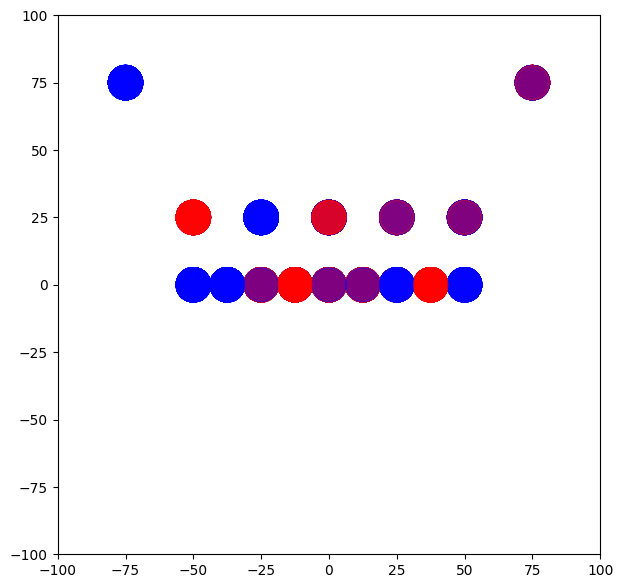

In [5]:
# @title **Global Polarity Head Plot Animation**
from google.colab import drive
drive.mount('/content/drive')

# @markdown *Note: **Red** is **Negative**, **Blue** is **Positive**, and the **Magnitude** of an electrode is indicated by **Decreasing Saturation**.*

# file_number = 10 # @param {allow-input: "true", type: "integer"}
# file_number += -1
import os; import pandas as pd; import matplotlib.pyplot as plt

def file_paths(folder_path):
  file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path)]
  return file_paths

directory_path = '/content/drive/MyDrive/F.O. Depository/P11_Trial46_Label0' # @param {type: "string"} 
# folder_path = file_paths('/content/drive/MyDrive/LISEF/RAWDATA/UNCLEANED/P10_Trial1')[file_number]
data_frame = pd.concat([pd.read_csv(file_path, names = ['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Other 1', 'Other 2', 'Other 3', 'Other 4', 'Other 5', 'Timestamp', 'Other 6', 'Timestamp (Formatted)']).drop(columns = ['Sample Index', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Other 1', 'Other 2', 'Other 3', 'Other 4', 'Other 5', 'Timestamp', 'Other 6', 'Timestamp (Formatted)']).iloc[5:1006] for file_path in [os.path.join(directory_path, path) for path in os.listdir(directory_path)]], axis = 1)

# -----------------------------------------

import matplotlib.animation as animation; from IPython.display import HTML

def update(frame):
  window = slice((frame * 10), (frame * 10) + 100)
  scatter = plt.scatter(c = [[0.6 * abs(value), 0.6 * abs(value), 1] if value >= 0.000_000_1 else [1, 0.6 * abs(value), 0.6 * abs(value)] for value in [sum([float(value)/1_000_000 for value in data_frame.iloc[window, i].values]) for i in range(0, 16)]], x = [value * 25 for value in [0, -2, 0, 2, 1, -1, -1, 1, 0.5, -0.5, -2, 2, 1.5, -3, -1.5, 3]], y = [value * 25 for value in [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 3]], s = [600] * 16, alpha = 0.5); plt.xlim(-100, 100); plt.ylim(-100, 100);
  return scatter
def animate_figure(fig, update_func, frames):
    # Create an animation object
    anim = animation.FuncAnimation(fig, update_func, frames=frames)
    
    # Display the animation
    return anim

anim = animate_figure(plt.figure(num = 8, figsize = (7, 7)), update_func = update, frames = 100)

HTML(anim.to_jshtml(fps = 20))
